In [10]:
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('Mrk509_arrays/avg_temp_2darr.npy', 'rb') as f:
    avg_temp_2darr = np.load(f)
    avg_temp_2darr_med = np.load(f)
    avg_temp_2darr_noIR = np.load(f)

with open('Mrk509_arrays/avg_temp_final.npy', 'rb') as f:
    avg_temp_split_all = np.load(f)
    avg_temp_split_med = np.load(f)
    avg_temp_split_noIR = np.load(f)
    
with open('Mrk509_arrays/transition.npy', 'rb') as f:
    n_transition_all = np.load(f)
    n_transition_med = np.load(f)
    n_transition_noIR = np.load(f)
    n_transition_stacked = np.load(f)
    te_transition_all = np.load(f)
    te_transition_med = np.load(f)
    te_transition_noIR = np.load(f)
    Te_transition_stacked = np.load(f)

In [3]:
xi_stepsize = 0.2
hden_stepsize = 0.1
xi = data.logspace(-1, 6, xi_stepsize)
hden = data.logspace(-1, 15, hden_stepsize)

xi_lin = data.linspace(-1, 6, xi_stepsize)
hden_lin = data.linspace(-1, 15, hden_stepsize)

xi_split = np.array_split(xi_lin, 4)
name_index  = {0:'full IR', 1:'intermediate IR', 2:'no IR'}

In [4]:
avg_temp_split_stacked = np.stack((avg_temp_split_all, avg_temp_split_med, avg_temp_split_noIR), axis=1)

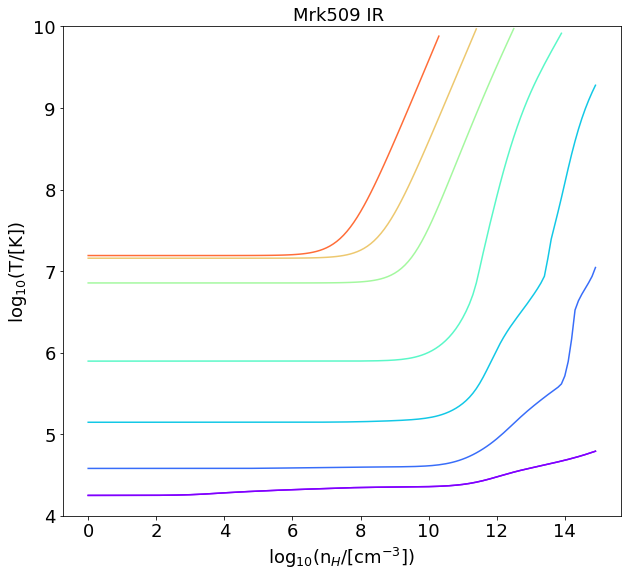

In [27]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Mrk509 IR ", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
plt.ylim(4, 10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 5 #increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][0]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i-5]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment

In [15]:
xi_lin_xs = data.linspace(-1, 6, 1)
hden_lin_xs = data.linspace(0, 15, 1)

Filename: Tmap_IR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TMAP          1 PrimaryHDU      25   (8, 16)   float64   


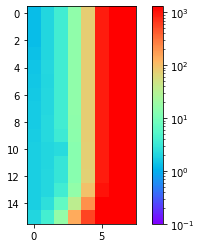

In [17]:
hdu = fits.open('Tmap_IR.fits')
#hdu = fits.open('Tmap_noIR.fits')
hdu.info()
IR_data = (hdu[0].data).astype('float64') # REtr
# Shows cnt files before masking and filtering 
fig, ax = plt.subplots()
plt.imshow(IR_data, cmap='rainbow', norm=colors.LogNorm(vmin=.1, vmax=1300))
plt.colorbar()

a = hdu[0].data
c = []
for j in range(len(xi_lin_xs)):
    b = [i[j] for i in a]
    c.append(b)
temp_n_xs = c

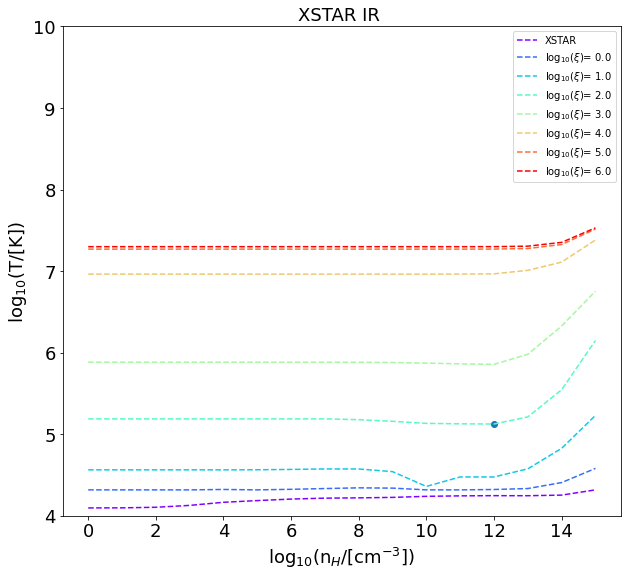

In [61]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("XSTAR IR ", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)
plt.ylim(4, 10)
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(1, len(temp_n_xs)):
    plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[i]) * 1e4) , color=colors[i], linestyle='--', label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))
plt.scatter(hden_lin_xs[12], np.log10(np.array(temp_n_xs[3][12]) * 1e4))

plt.legend()

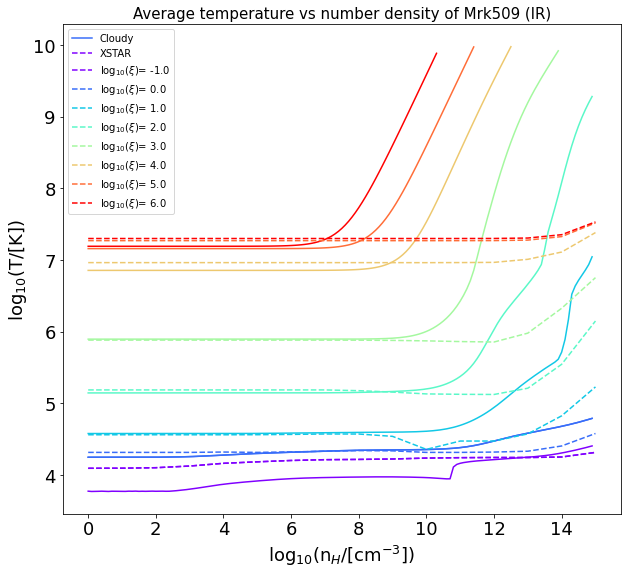

In [290]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of Mrk509 (IR)", fontsize=15)
#plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 0 #increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][0]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(len(temp_n_xs)):
    plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[i]) * 1e4) , color=colors[i], linestyle='--', label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))

plt.legend()

In [64]:
import PION_read as PION

In [66]:
hden_PION_IR, xi_PION_IR, temp_PION_IR = PION.PION_read('calc_IR')
hden_PION_noIR, xi_PION_noIR, temp_PION_noIR = PION.PION_read('calc_noIR')

xi_lin_PION = xi_PION_IR[0:8]
hden_lin_PION = data.linspace(0, 15, 1)

temp_hden_PION = np.array_split(list(temp_PION_IR), len(hden_lin_PION))
temp_xi_PION =  PION.temp_xi_PION(xi_lin_PION, temp_hden_PION)

temp_hden_PION_noIR = np.array_split(list(temp_PION_noIR), len(hden_lin_PION))
temp_xi_PION_noIR =  PION.temp_xi_PION(xi_lin_PION, temp_hden_PION_noIR)

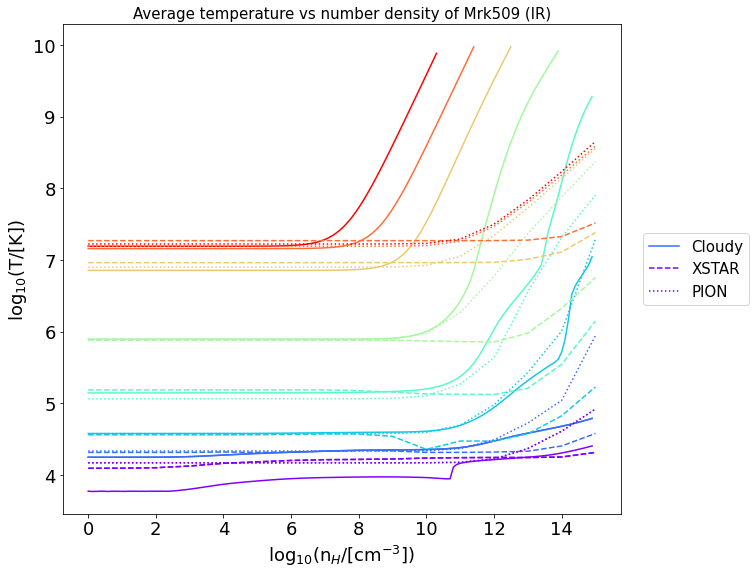

In [291]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of Mrk509 (IR)", fontsize=15)
#plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 0 #increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][0]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment
    
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)-1):
    plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs[i]) * 1e4) , color=colors[i], linestyle='--')#, label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))


colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
plt.plot(hden_lin_PION, np.log10(temp_xi_PION[0]), linestyle=':', color=colors[0], label='PION')
for i in range(len(temp_xi_PION)):
    plt.plot(hden_lin_PION, np.log10(temp_xi_PION[i]), linestyle=':', color=colors[i])
plt.legend()   


plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

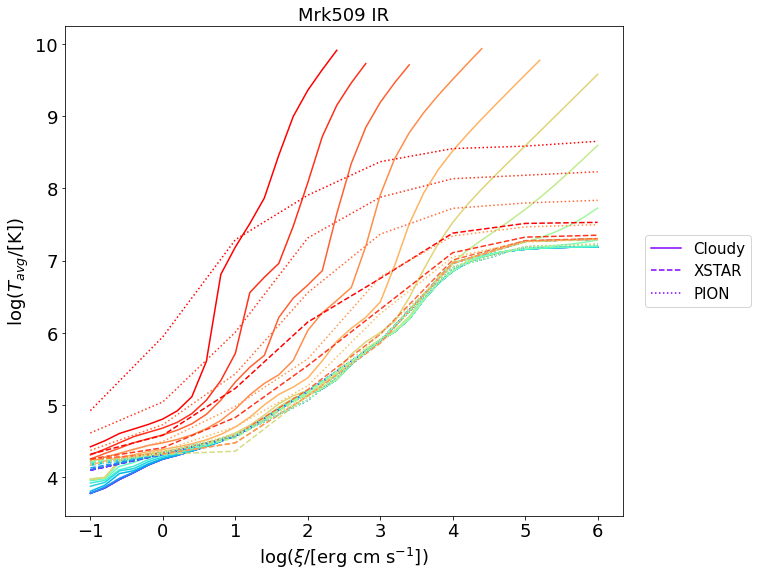

In [93]:

fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "Mrk509 IR",
    fontsize=18,
)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log($T_{avg} $/[K])', fontsize=18)
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))

i = 10 # index 10 corresponds to hden = 0 (skips -[1~0) )
plt.plot(xi_lin, np.log10(avg_temp_2darr[0]), color=colors[0], label='Cloudy')
while i <= len(hden):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i])#, label=str(hden_lin[i]))
        #, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i],# label=str(hden_lin[i]),
        ) 
    i += 10  

colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
plt.plot(xi_lin_xs, np.log10(np.array(IR_data[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))
for i in range(len(hden_lin_xs)):
    plt.plot(xi_lin_xs, np.log10(np.array(IR_data[i]) * 1e4), color=colors[i], linestyle='--')#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_hden_PION)))
plt.plot(xi_lin_PION, np.log10(temp_hden_PION[0]), color=colors[0], linestyle=':', label='PION')
for i in range(len(temp_hden_PION)):
    plt.plot(xi_lin_PION, np.log10(temp_hden_PION[i]), color=colors[i], linestyle=':') #, label=str(hden_lin_PION[i])

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Filename: Tmap_noIR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TMAP          1 PrimaryHDU      25   (8, 16)   float64   


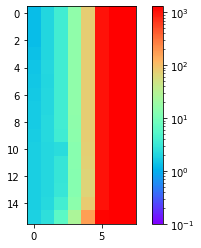

In [96]:
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

hdu = fits.open('Tmap_noIR.fits')
hdu.info()
noIR_data = (hdu[0].data).astype('float64') # REtr
# Shows cnt files before masking and filtering 
fig, ax = plt.subplots()
plt.imshow(noIR_data, cmap='rainbow', norm=colors.LogNorm(vmin=.1, vmax=1300))
plt.colorbar()

a = hdu[0].data
c = []
for j in range(len(xi_lin_xs)):
    b = [i[j] for i in a]
    c.append(b)
temp_n_xs_noIR = c

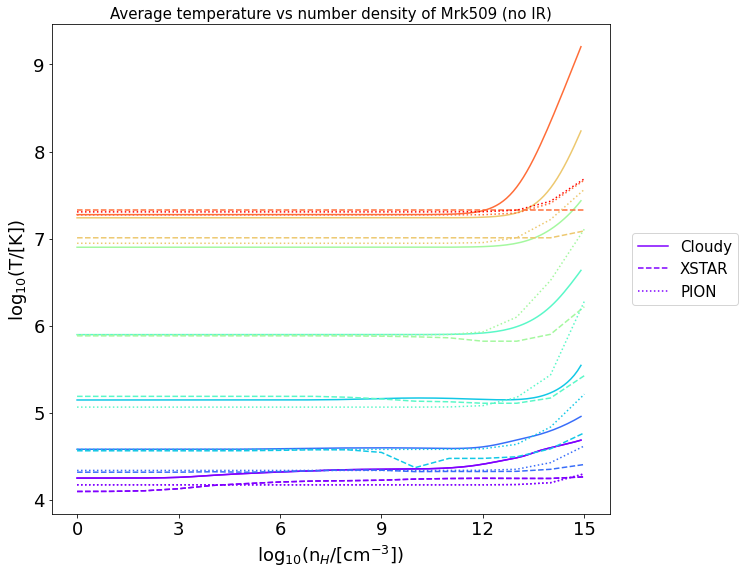

In [134]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of Mrk509 (no IR)", fontsize=15)
#plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
ax.set_xticks([0, 3, 6, 9, 12, 15])
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 5#increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][2]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i-5]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs_noIR[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)-1):
    plt.plot(hden_lin_xs, np.log10(np.array(temp_n_xs_noIR[i]) * 1e4), color=colors[i], linestyle='--')#, label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
plt.plot(hden_lin_PION, np.log10(temp_xi_PION_noIR[0]), linestyle=':', color=colors[0], label='PION')#, label=str(xi_lin_PION[i]))
for i in range(len(temp_xi_PION)):
    plt.plot(hden_lin_PION, np.log10(temp_xi_PION_noIR[i]), linestyle=':', color=colors[i])#, label=str(xi_lin_PION[i]))
    

#plt.text(hden_lin[0], np.log10(avg_temp_split_stacked[0][0][0]), "xi=" + str(xi_lin[0]), fontsize=12)
#lt.colorbar()
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

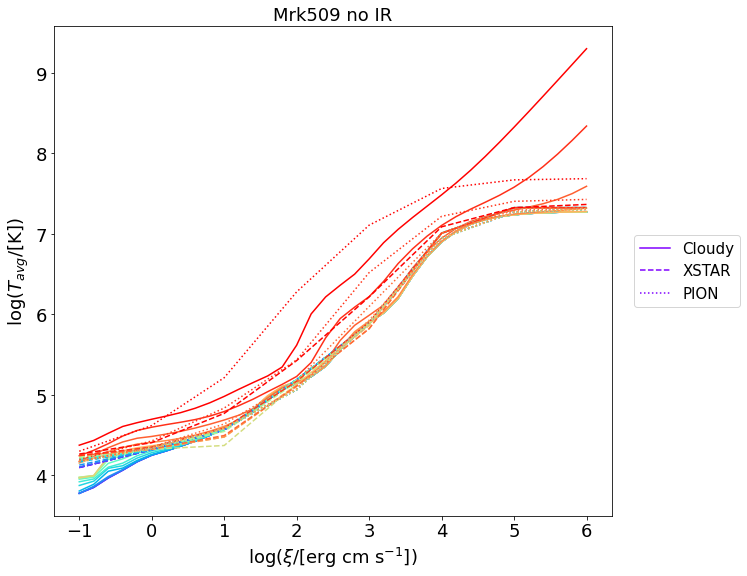

In [114]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "Mrk509 no IR",
    fontsize=18,
)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log($T_{avg} $/[K])', fontsize=18)
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr_noIR)))
plt.plot(xi_lin, np.log10(avg_temp_2darr_noIR[0]), color=colors[0], label='Cloudy')#, label=str(hden_lin[i]))
i = 10 # index 10 corresponds to hden = 0 (skips -[1~0) )
while i <= len(hden):
    row = np.array(avg_temp_2darr_noIR[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i])#, label=str(hden_lin[i]))
        #, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i], label=str(hden_lin[i]),
            #label="n_h=10^" + str(hden_lin[i]) + ' (all)',
        ) 
    i += 10  

colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
plt.plot(xi_lin_xs, np.log10(np.array(noIR_data[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))
for i in range(len(hden_lin_xs)):
    plt.plot(xi_lin_xs, np.log10(np.array(noIR_data[i]) * 1e4), color=colors[i], linestyle='--')
    
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_hden_PION_noIR)))
plt.plot(xi_lin_PION, np.log10(temp_hden_PION_noIR[0]), color=colors[0], linestyle=':', label='PION') # ,label=str(hden_lin_PION[i])
for i in range(len(temp_hden_PION_noIR)):
    plt.plot(xi_lin_PION, np.log10(temp_hden_PION_noIR[i]), color=colors[i], linestyle=':') # ,label=str(hden_lin_PION[i])

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

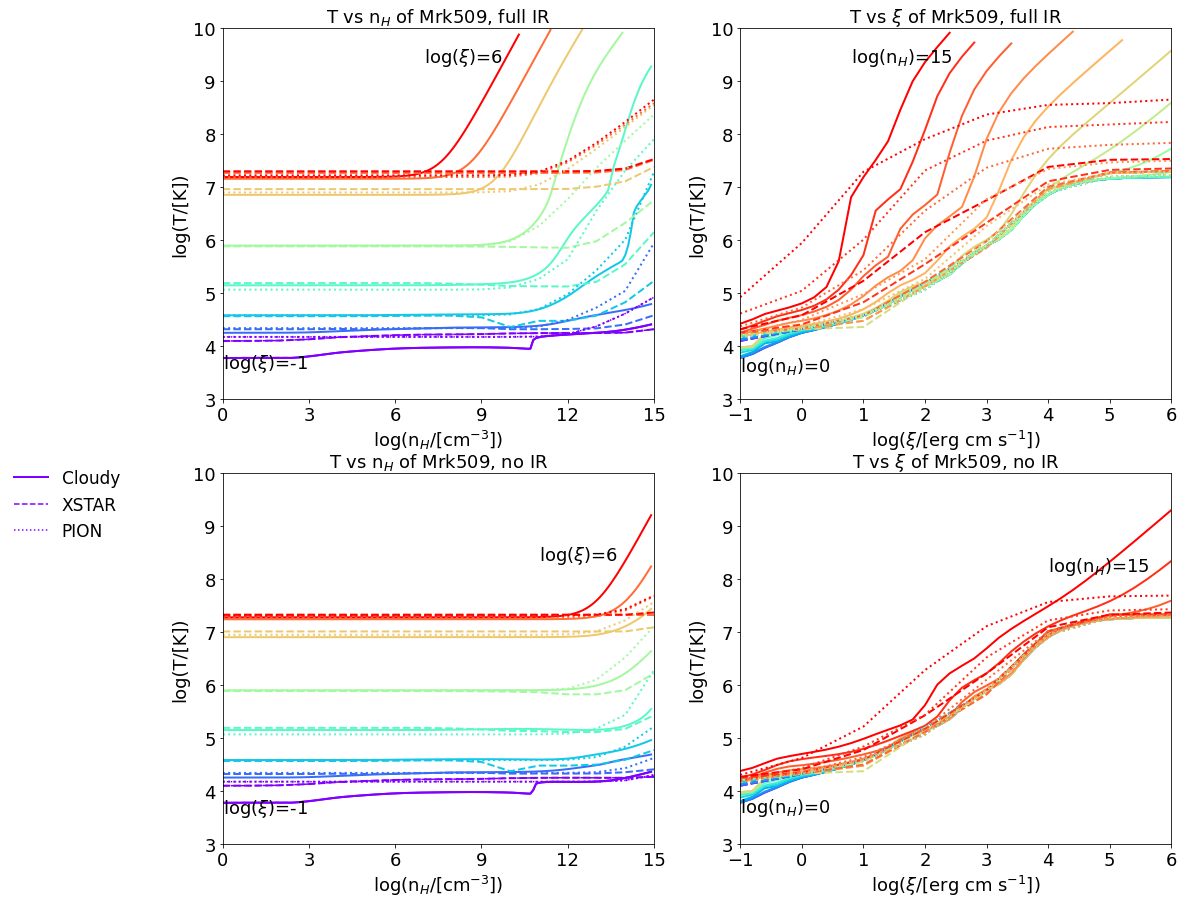

In [312]:
fig, axs = plt.subplots(2, 2, figsize=(17, 15))


############# Left side ##############################
######################################################################## IR
axs[0, 0].set_title("T vs n$_H$ of Mrk509, full IR", fontsize=18)
axs[0, 0].set_xlabel(r'log(n$_H$/[cm$^{-3}$])', fontsize=18)
axs[0, 0].set_ylabel(r'log(T/[K])', fontsize=18)
axs[0, 0].tick_params(axis='x', labelsize= 18) 
axs[0, 0].tick_params(axis='y', labelsize= 18)
axs[0, 0].set_xticks([0, 3, 6, 9, 12, 15])
axs[0, 0].set_xlim(0, 15)
axs[0, 0].set_ylim(3, 10)
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 0 #increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][0]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 0:
        axs[0, 0].plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
        , linewidth=2
        , label= 'Cloudy')
    if len(index) == len(row):
        axs[0, 0].plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
        , linewidth=2
        ,) 
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[0, 0].plot(
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
        , linewidth=2
        )  
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
axs[0, 0].plot(hden_lin_xs, np.log10(np.array(temp_n_xs[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)):
    axs[0, 0].plot(hden_lin_xs, np.log10(np.array(temp_n_xs[i]) * 1e4) , color=colors[i], linestyle='--', linewidth=2)#, label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
axs[0, 0].plot(hden_lin_PION, np.log10(temp_xi_PION[0]), linestyle=':', color=colors[0], label='PION')
for i in range(len(temp_xi_PION)):
    axs[0, 0].plot(hden_lin_PION, np.log10(temp_xi_PION[i]), linestyle=':', color=colors[i], linewidth=2)
#axs[0, 0].legend()
    
######################################################################

################################################################# no IR T vs n
axs[1, 0].set_title("T vs n$_H$ of Mrk509, no IR", fontsize=18)
axs[1, 0].set_xlabel(r'log(n$_H$/[cm$^{-3}$])', fontsize=18)
axs[1, 0].set_ylabel(r'log(T/[K])', fontsize=18)
axs[1, 0].tick_params(axis='x', labelsize= 18) 
axs[1, 0].tick_params(axis='y', labelsize= 18) 
axs[1, 0].set_xticks([0, 3, 6, 9, 12, 15])
axs[1, 0].set_xlim(0, 15)
axs[1, 0].set_ylim(3, 10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 0 #increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][2]
    (index,) = np.where(row != 1e-30)
    if i == 0:
        axs[1, 0].plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
        , linewidth=2
        , label= 'Cloudy')
    if len(index) == len(row):
        print()
        axs[1, 0].plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i]
            , label="log($\\xi$)= " + str(xi_lin[i])
            , linewidth=2
        )
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[1, 0].plot(
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i]
            , linewidth=2
           , #label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]) 
        ) 
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
axs[1, 0].plot(hden_lin_xs, np.log10(np.array(temp_n_xs_noIR[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)):
    axs[1, 0].plot(hden_lin_xs, np.log10(np.array(temp_n_xs_noIR[i]) * 1e4), color=colors[i], linestyle='--', label="log($\\xi$)= " + str(xi_lin_xs[i]), linewidth=2)

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_xi_PION)))
axs[1, 0].plot(hden_lin_PION, np.log10(temp_xi_PION_noIR[0]), linestyle=':', color=colors[0], label='PION')#, label=str(xi_lin_PION[i]))
for i in range(len(temp_xi_PION)):
    axs[1, 0].plot(hden_lin_PION, np.log10(temp_xi_PION_noIR[i]), linestyle=':', color=colors[i], label="log($\\xi$)= " + str(xi_lin_xs[i]), linewidth=2)

#axs[1, 0].legend()#bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)
################################################################################
    
    
 

###################### right side ##############################
################################################################# IR T vs xi
axs[0, 1].set_title(
    "T vs $\\xi$ of Mrk509, full IR",
    fontsize=18,
)
axs[0, 1].set_xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
axs[0, 1].set_ylabel(r'log(T/[K])', fontsize=18)
axs[0, 1].tick_params(axis='x', labelsize= 18) 
axs[0, 1].tick_params(axis='y', labelsize= 18)
axs[0, 1].set_xticks([-1, 0, 1, 2, 3, 4, 5, 6])
axs[0, 1].set_xlim(-1, 6)
axs[0, 1].set_ylim(3, 10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))
i = 10 # index 10 corresponds to hden = 0 (skips -[1~0) )
#axs[0, 1].plot(xi_lin, np.log10(avg_temp_2darr[0]), color=colors[0], label='Cloudy')
while i <= len(hden):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        axs[0, 1].plot(xi_lin, np.log10(row), color=colors[i], linewidth=2)
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[0, 1].plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i] # label=str(hden_lin[i]),
            , linewidth=2
        ) 
    i += 10  

colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
#axs[0, 1].plot(xi_lin_xs, np.log10(np.array(IR_data[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))
for i in range(len(hden_lin_xs)):
    axs[0, 1].plot(xi_lin_xs, np.log10(np.array(IR_data[i]) * 1e4), color=colors[i], linestyle='--', linewidth=2)#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_hden_PION)))
#axs[0, 1].plot(xi_lin_PION, np.log10(temp_hden_PION[0]), color=colors[0], linestyle=':', label='PION')
for i in range(len(temp_hden_PION)):
    axs[0, 1].plot(xi_lin_PION, np.log10(temp_hden_PION[i]), color=colors[i], linestyle=':', label=str(hden_lin_PION[i]), linewidth=2)
#axs[0, 1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize = 17, frameon=False)
######################################################################



################################################################### no IR T vs xi
axs[1, 1].set_title(
    "T vs $\\xi$ of Mrk509, no IR",
    fontsize=18,
)
axs[1, 1].set_xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
axs[1, 1].set_ylabel(r'log(T/[K])', fontsize=18)
axs[1, 1].tick_params(axis='x', labelsize= 18) 
axs[1, 1].tick_params(axis='y', labelsize= 18) 
axs[1, 1].set_xticks([-1, 0, 1, 2, 3, 4, 5, 6])
axs[1, 1].set_xlim(-1, 6)
axs[1, 1].set_ylim(3, 10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr_noIR)))
#axs[1, 1].plot(xi_lin, np.log10(avg_temp_2darr_noIR[0]), color=colors[0], label='Cloudy')#, label=str(hden_lin[i]))
i = 10 # index 10 corresponds to hden = 0 (skips -[1~0) )
while i <= len(hden):
    row = np.array(avg_temp_2darr_noIR[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        axs[1, 1].plot(xi_lin, np.log10(row), color=colors[i], linewidth=2)#, label=str(hden_lin[i]))
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[1, 1].plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i], label=str(hden_lin[i])
        , linewidth=2
        ) 
    i += 10  

colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
#axs[1, 1].plot(xi_lin_xs, np.log10(np.array(noIR_data[0]) * 1e4), color=colors[0], linestyle='--', label='XSTAR')#, label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]))
for i in range(len(hden_lin_xs)):
    axs[1, 1].plot(xi_lin_xs, np.log10(np.array(noIR_data[i]) * 1e4), color=colors[i], linestyle='--', linewidth=2)
    
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_hden_PION_noIR)))
#axs[1, 1].plot(xi_lin_PION, np.log10(temp_hden_PION_noIR[0]), color=colors[0], linestyle=':', label='PION') # ,label=str(hden_lin_PION[i])
for i in range(len(temp_hden_PION_noIR)):
    axs[1, 1].plot(xi_lin_PION, np.log10(temp_hden_PION_noIR[i]), color=colors[i], linestyle=':', linewidth=2) # ,label=str(hden_lin_PION[i])

axs[0, 0].text(hden_lin_xs[0], np.log10(avg_temp_2darr[0][0])-.2, 'log($\\xi$)=-1', fontsize=18)
axs[0, 0].text(hden_lin_xs[7], np.log10(avg_temp_2darr[-1][15]), 'log($\\xi$)=6', fontsize=18)  
    
axs[0, 1].text(xi_lin[0], np.log10(avg_temp_2darr[0][0])-.25, 'log(n$_H$)=0', fontsize=18)
axs[0, 1].text(xi_lin[9], np.log10(avg_temp_2darr[-1][15]), 'log(n$_H$)=15', fontsize=18)    

axs[1, 0].text(hden_lin_xs[0], np.log10(avg_temp_2darr[0][0])-.2, 'log($\\xi$)=-1', fontsize=18)
axs[1, 0].text(hden_lin_xs[11], np.log10(avg_temp_2darr[-1][15])-1, 'log($\\xi$)=6', fontsize=18) 
    
axs[1, 1].text(xi_lin[0], np.log10(avg_temp_2darr_noIR[0][0])-.18, 'log(n$_H$)=0', fontsize=18)
axs[1, 1].text(xi_lin[25], np.log10(avg_temp_2darr_noIR[-1][29]), 'log(n$_H$)=15', fontsize=18)

########################################################################

#axs[0, 0].legend(bbox_to_anchor=(1.04, 0.5), loc=3, borderaxespad=0, fontsize = 17, frameon=False)
#axs[1, 1].legend(bbox_to_anchor=(1.1, 0.3), loc=3, borderaxespad=0, fontsize = 17, frameon=False)
axs[0, 0].legend(bbox_to_anchor=(-.5, -.4), loc=3, borderaxespad=0, fontsize = 17, frameon=False)